In [14]:
import xarray as xr
import sklearn

import numpy as np
import pandas as pd
from pathlib import Path

import os, sys
import glob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')

from scipy import stats
from scipy.stats import percentileofscore

from datetime import datetime, timedelta



In [2]:
#Calculate the non-tidal residuals (NTR) for the tide gauge data

In [3]:
#Can we attribute the NTR to low pressure events? (maybe compare with Sam's residual SLP data)
#plot the time series together for water year 2018
#what does Sam's dataset look like 
mb_sam=pd.read_fwf("/global/scratch/users/jennaisrael/time_varying_data/slr_data_sam/data4regrbuild.daily.era5.monterey.norm0.txt")
mb_sam.columns=["Year", "Month", "Day", "ResWL_lo", "ResWL_hi", "SLPa", "TASa", "N34a", "PDOa", "U10a", "V10a"]
mb_sam


,Year,Month,Day,ResWL_lo,ResWL_hi,SLPa,TASa,N34a,PDOa,U10a,V10a
0,1973,11,12,-0.02788,0.05941,-2.01526,1.15286,-2.07505,-1.28235,0.58345,62.36506
1,1973,11,13,-0.02278,0.01739,0.51379,0.14197,-2.08711,-1.28528,-10.66715,35.28530
2,1973,11,14,-0.01262,-0.03827,2.04980,0.37289,-2.09914,-1.28824,-9.67575,30.52757
3,1973,11,15,-0.00850,-0.06106,2.26141,0.08441,-2.11116,-1.29122,-12.71806,30.81868
4,1973,11,16,-0.02547,0.00956,-3.54065,0.87811,-2.11025,-1.27463,-8.62905,67.52818
...,...,...,...,...,...,...,...,...,...,...,...
17092,2020,12,27,-0.00009,0.01417,-1.68414,-1.22424,-1.32486,-0.91245,-1.72206,2.64090
17093,2020,12,28,0.00145,0.13299,-12.65814,-1.16611,-1.32366,-0.91397,9.90384,20.82512
17094,2020,12,29,0.00355,0.00568,0.04828,-0.54269,-1.32248,-0.91541,10.16266,-30.99345
17095,2020,12,30,0.00470,-0.07551,7.64056,-0.49118,-1.32132,-0.91676,2.84751,-3.36609


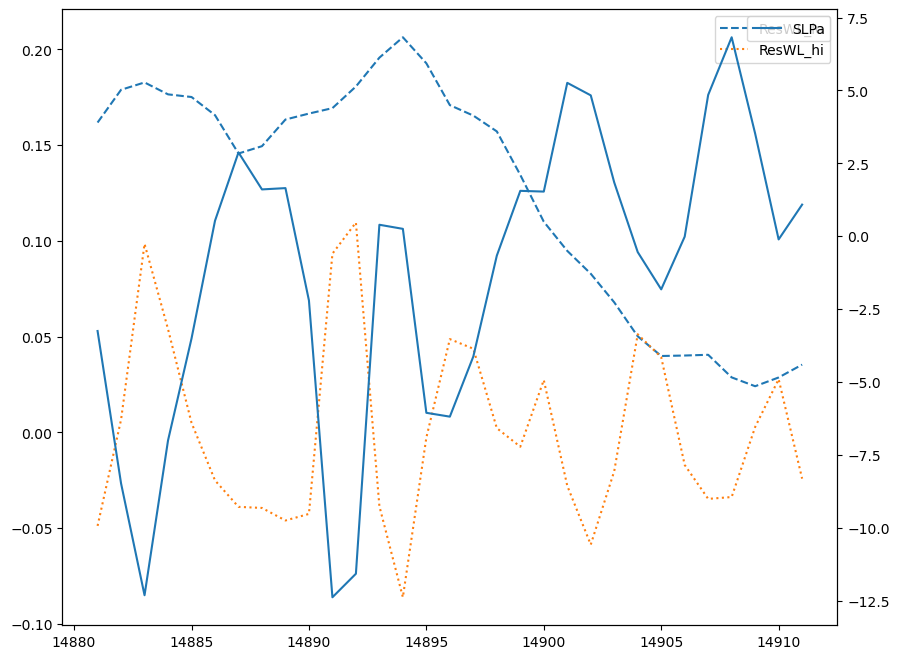

In [4]:
#Jan 2018
fig, ax = plt.subplots(1,figsize=(10,8))

ax.plot(mb_sam.where((mb_sam.Year==2014) & (mb_sam.Month==12)).ResWL_lo,label='ResWL_lo',linestyle="--")
ax.plot(mb_sam.where((mb_sam.Year==2014) & (mb_sam.Month==12) ).ResWL_hi,label='ResWL_hi',linestyle=":")

ax2=ax.twinx()

ax2.plot(mb_sam.where((mb_sam.Year==2014) & (mb_sam.Month==12)).SLPa,label="SLPa")
ax.legend()
ax2.legend()

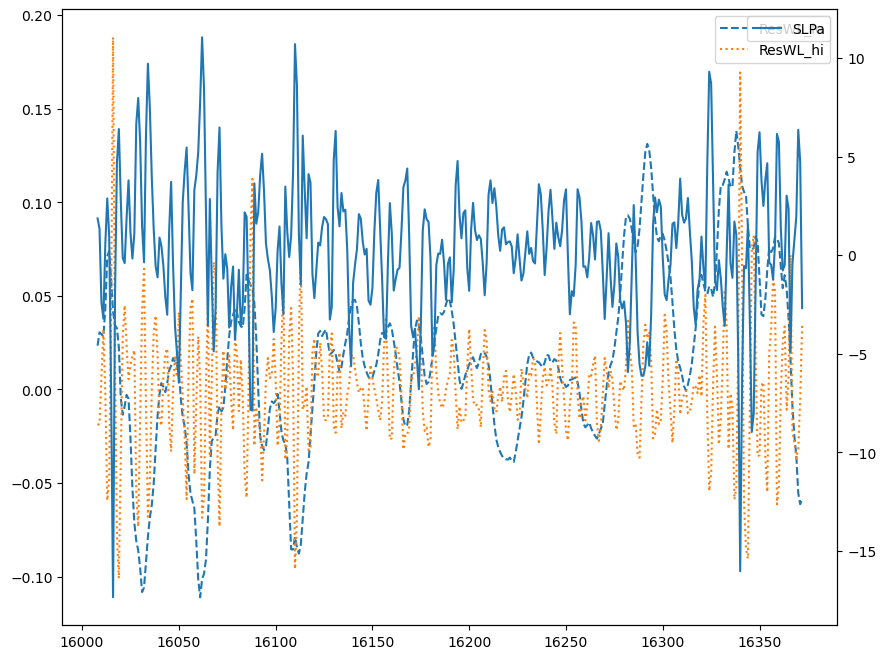

In [5]:
fig, ax = plt.subplots(1,figsize=(10,8))

ax.plot(mb_sam.where(mb_sam.Year==2018).ResWL_lo,label='ResWL_lo',linestyle="--")
ax.plot(mb_sam.where(mb_sam.Year==2018).ResWL_hi,label='ResWL_hi',linestyle=":")

ax2=ax.twinx()

ax2.plot(mb_sam.where(mb_sam.Year==2018).SLPa,label="SLPa")
ax.legend()
ax2.legend()

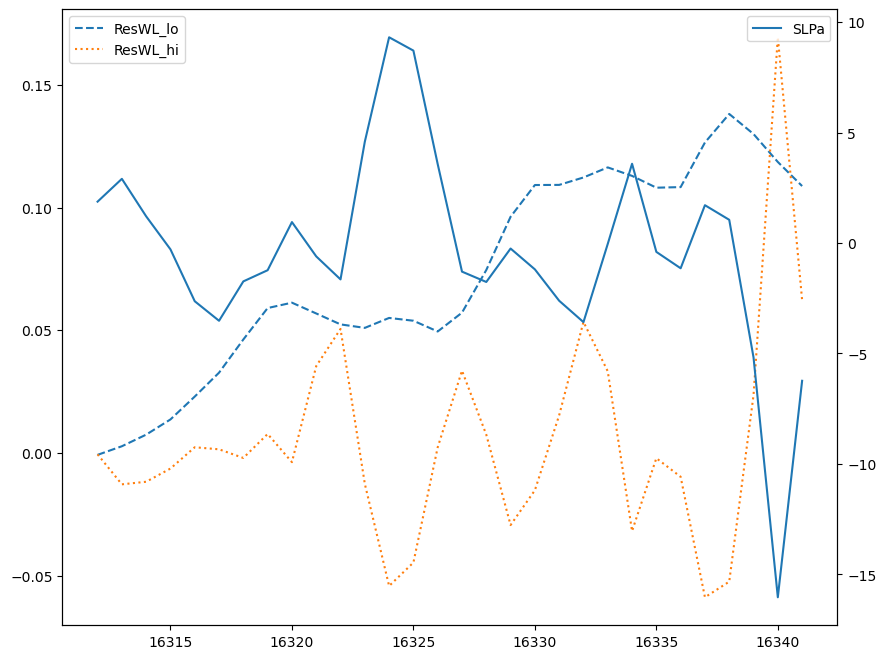

In [6]:
#Jan 2018
fig, ax = plt.subplots(1,figsize=(10,8))

ax.plot(mb_sam.where((mb_sam.Year==2018) & (mb_sam.Month==11)).ResWL_lo,label='ResWL_lo',linestyle="--")
ax.plot(mb_sam.where((mb_sam.Year==2018) & (mb_sam.Month==11) ).ResWL_hi,label='ResWL_hi',linestyle=":")

ax2=ax.twinx()

ax2.plot(mb_sam.where((mb_sam.Year==2018) & (mb_sam.Month==11)).SLPa,label="SLPa")
ax.legend()
ax2.legend()

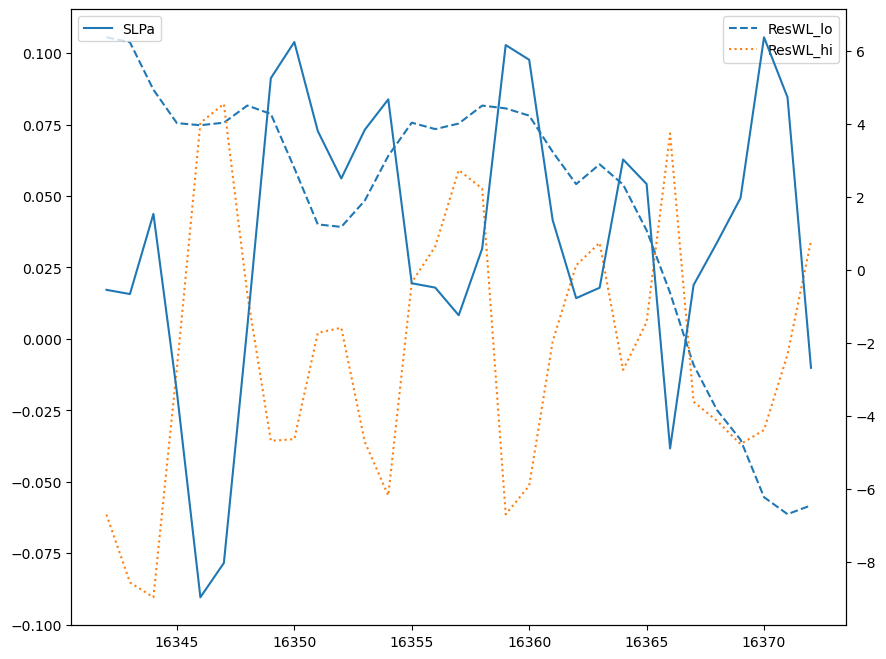

In [7]:
#Dec 2018
fig, ax = plt.subplots(1,figsize=(10,8))

ax.plot(mb_sam.where((mb_sam.Year==2018) & (mb_sam.Month==12)).ResWL_lo,label='ResWL_lo',linestyle="--")
ax.plot(mb_sam.where((mb_sam.Year==2018) & (mb_sam.Month==12)).ResWL_hi,label='ResWL_hi',linestyle=":")

ax2=ax.twinx()

ax2.plot(mb_sam.where((mb_sam.Year==2018) & (mb_sam.Month==12)).SLPa,label="SLPa")
ax.legend()
ax2.legend()

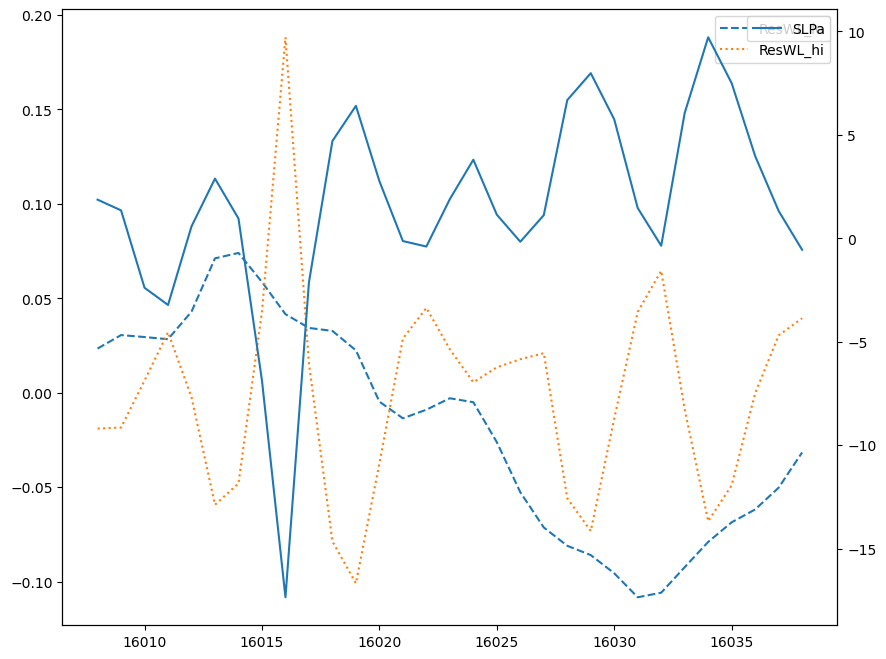

In [8]:
#Jan 2018
fig, ax = plt.subplots(1,figsize=(10,8))

ax.plot(mb_sam.where((mb_sam.Year==2018) & (mb_sam.Month==1)).ResWL_lo,label='ResWL_lo',linestyle="--")
ax.plot(mb_sam.where((mb_sam.Year==2018) & (mb_sam.Month==1) ).ResWL_hi,label='ResWL_hi',linestyle=":")

ax2=ax.twinx()

ax2.plot(mb_sam.where((mb_sam.Year==2018) & (mb_sam.Month==1)).SLPa,label="SLPa")
ax.legend()
ax2.legend()

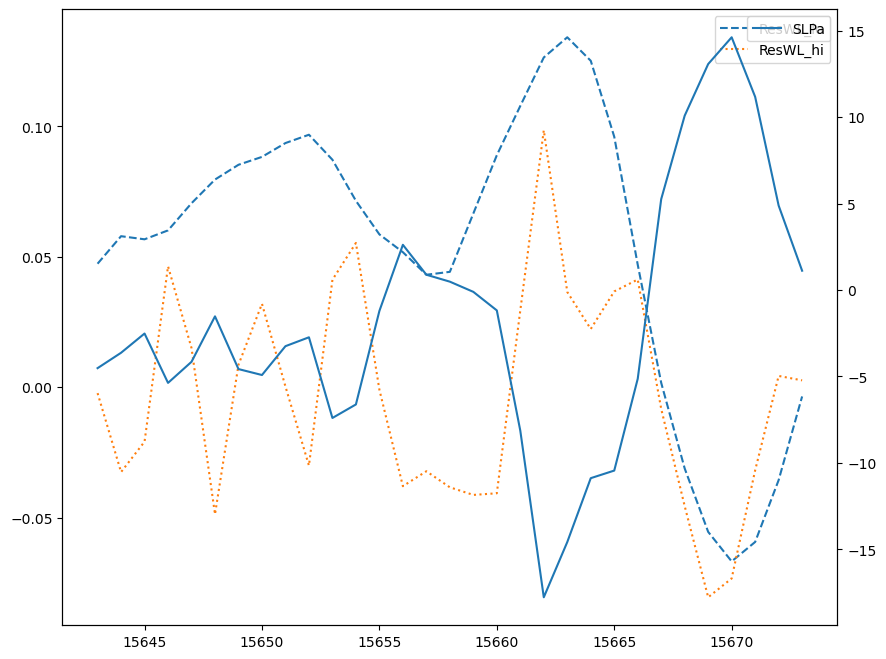

In [9]:
#Jan 2018
fig, ax = plt.subplots(1,figsize=(10,8))

ax.plot(mb_sam.where((mb_sam.Year==2017) & (mb_sam.Month==1)).ResWL_lo,label='ResWL_lo',linestyle="--")
ax.plot(mb_sam.where((mb_sam.Year==2017) & (mb_sam.Month==1) ).ResWL_hi,label='ResWL_hi',linestyle=":")

ax2=ax.twinx()

ax2.plot(mb_sam.where((mb_sam.Year==2017) & (mb_sam.Month==1)).SLPa,label="SLPa")
ax.legend()
ax2.legend()

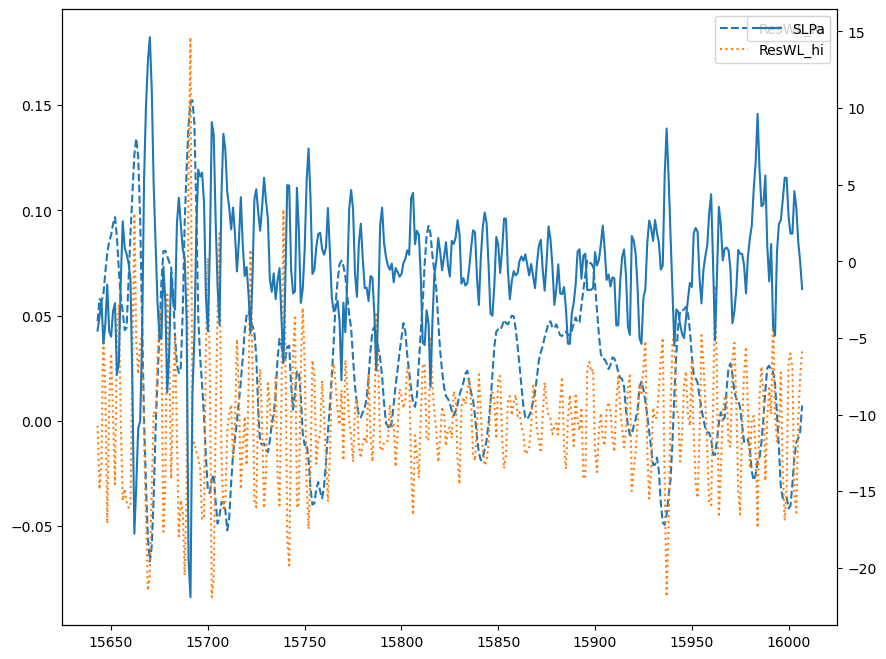

In [10]:
fig, ax = plt.subplots(1,figsize=(10,8))

ax.plot(mb_sam.where(mb_sam.Year==2017).ResWL_lo,label='ResWL_lo',linestyle="--")
ax.plot(mb_sam.where(mb_sam.Year==2017).ResWL_hi,label='ResWL_hi',linestyle=":")

ax2=ax.twinx()

ax2.plot(mb_sam.where(mb_sam.Year==2017).SLPa,label="SLPa")
ax.legend()
ax2.legend()

In [11]:
mb_sam['ResWL_total']=mb_sam["ResWL_hi"]+mb_sam["ResWL_lo"]
mb_sam["date"]=pd.to_datetime(mb_sam[['Year', 'Month', 'Day']])
mb_sam.index=mb_sam["date"]
mb_sam

,Year,Month,Day,ResWL_lo,ResWL_hi,SLPa,TASa,N34a,PDOa,U10a,V10a,ResWL_total,date
date,,,,,,,,,,,,,
1973-11-12,1973,11,12,-0.02788,0.05941,-2.01526,1.15286,-2.07505,-1.28235,0.58345,62.36506,0.03153,1973-11-12
1973-11-13,1973,11,13,-0.02278,0.01739,0.51379,0.14197,-2.08711,-1.28528,-10.66715,35.28530,-0.00539,1973-11-13
1973-11-14,1973,11,14,-0.01262,-0.03827,2.04980,0.37289,-2.09914,-1.28824,-9.67575,30.52757,-0.05089,1973-11-14
1973-11-15,1973,11,15,-0.00850,-0.06106,2.26141,0.08441,-2.11116,-1.29122,-12.71806,30.81868,-0.06956,1973-11-15
1973-11-16,1973,11,16,-0.02547,0.00956,-3.54065,0.87811,-2.11025,-1.27463,-8.62905,67.52818,-0.01591,1973-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,-0.00009,0.01417,-1.68414,-1.22424,-1.32486,-0.91245,-1.72206,2.64090,0.01408,2020-12-27
2020-12-28,2020,12,28,0.00145,0.13299,-12.65814,-1.16611,-1.32366,-0.91397,9.90384,20.82512,0.13444,2020-12-28
2020-12-29,2020,12,29,0.00355,0.00568,0.04828,-0.54269,-1.32248,-0.91541,10.16266,-30.99345,0.00923,2020-12-29


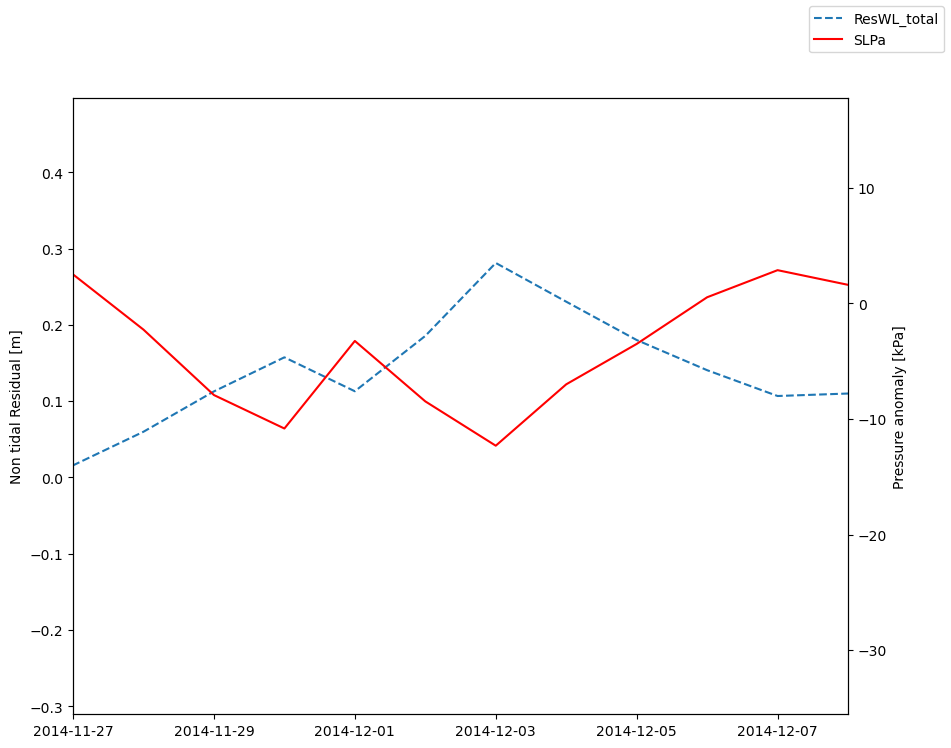

In [18]:
#storm event 11/29/2014 to 12/08/2014
#Jan 2018
fig, ax = plt.subplots(1,figsize=(10,8),sharex=True)

ax.plot(mb_sam.ResWL_total,label='ResWL_total',linestyle="--")
ax.set_ylabel('Non tidal Residual [m]')

ax2=ax.twinx()

ax2.plot(mb_sam.SLPa,label="SLPa",color='r')
ax2.set_ylabel('Pressure anomaly [kPa]')

ax3=ax.twinx()

ax3.plot(mb_sam.U10a,label='U10a')
ax3.plot(mb_sam.V10a,label='U10a')

ax.set_xlim([datetime(2014,11,27),datetime(2014,12,8)])

fig.legend()